<a href="https://colab.research.google.com/github/G-Poornima/LetsGrowMore---Data-Analysis-Internship/blob/main/_Task_1_Iris_flowers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LOADING NECESSARY LIBRARIES

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

print ("The libraries are loaded successfully.")

The libraries are loaded successfully.


## LOADING AND READING THE DATA


In [ ]:
iris = pd.read_csv("/IRIS.csv")
print ("The dataset is loaded and read succesfully.")

The dataset is loaded and read succesfully.


In [ ]:
iris

,id,sepal_length_cms,sepal_width_cms,petal_length_cms,petal_width_cms,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#### The complete Dataset with 150 rows and 6 columns.

## DATA WRANGLING AND UNDERSTANDING THE DATA


In [ ]:
#returns the datatypes of all columns
iris.dtypes

id                    int64
sepal_length_cms    float64
sepal_width_cms     float64
petal_length_cms    float64
petal_width_cms     float64
species              object
dtype: object

#### It is now clear that the data types and the values of the column match perfectly, so there is no need for converting any value/column's datatype from one to other.

In [ ]:
#general information about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                150 non-null    int64  
 1   sepal_length_cms  150 non-null    float64
 2   sepal_width_cms   150 non-null    float64
 3   petal_length_cms  150 non-null    float64
 4   petal_width_cms   150 non-null    float64
 5   species           150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#returns count of the unique values
iris.value_counts()

id   sepal_length_cms  sepal_width_cms  petal_length_cms  petal_width_cms  species        
150  5.9               3.0              5.1               1.8              Iris-virginica     1
56   5.7               2.8              4.5               1.3              Iris-versicolor    1
54   5.5               2.3              4.0               1.3              Iris-versicolor    1
53   6.9               3.1              4.9               1.5              Iris-versicolor    1
52   6.4               3.2              4.5               1.5              Iris-versicolor    1
                                                                                             ..
100  5.7               2.8              4.1               1.3              Iris-versicolor    1
99   5.1               2.5              3.0               1.1              Iris-versicolor    1
98   6.2               2.9              4.3               1.3              Iris-versicolor    1
97   5.7               2.9              4.2  

#### The result set is in descending order with the most frequent value on top. 

In [ ]:
#checking for the total number of null values in each column.
iris.isnull().sum()

id                  0
sepal_length_cms    0
sepal_width_cms     0
petal_length_cms    0
petal_width_cms     0
species             0
dtype: int64

#### There are no null values in any of the column. 

In [ ]:
#checking for total number of duplicate values
iris.duplicated().sum()

0

#### There are no duplicate values in the dataset.

In [ ]:
#statistical summary of all the columns
#"include" parameter gives the summary of all columns including the ones with the datatype 'object' 
iris.describe(include = "all")

,id,sepal_length_cms,sepal_width_cms,petal_length_cms,petal_width_cms,species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
#checking for unique species
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#checking for count of unique species
iris['species'].value_counts().to_frame()

,species
Iris-setosa,50
Iris-virginica,50
Iris-versicolor,50


## DATA VISUALISATION

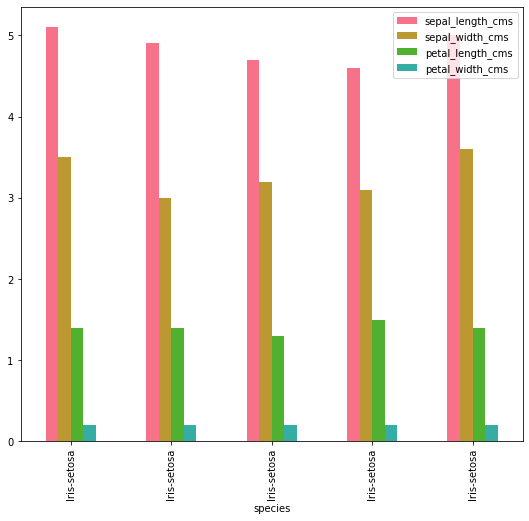

In [ ]:
iris.head().plot(x="species", y=["sepal_length_cms", "sepal_width_cms", "petal_length_cms", "petal_width_cms"], kind="bar", figsize=(9,8))
plt.show()

#### This is a plot showing the relationship between all five variables of the dataframe. To obtain a clear graph, the head() function is used to minimize the input data, which happens to be only about species *Iris-setosa*. 

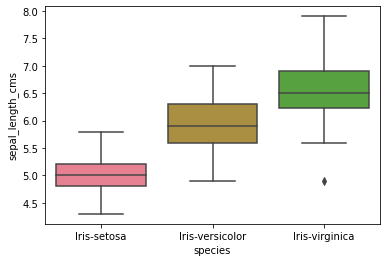

In [ ]:
sns.boxplot(x="species", y= "sepal_length_cms", data= iris)

#### Using Box-plot , we can see the distribution of different categories of Iris species over their Sepal length feature. 
#### We can see that the sepal length of species *Iris-virginica* is in a range of length longer than the other two. There also seems to be an outlier situated below the lower extreme of the species' plot. 

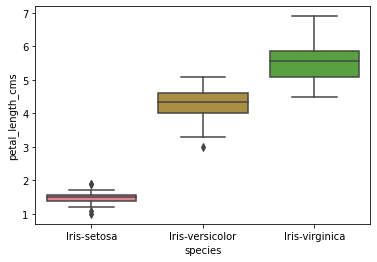

In [ ]:
#boxplot to show the distribution of Iris species over their petal length feature
sns.boxplot(x="species", y= "petal_length_cms", data= iris)

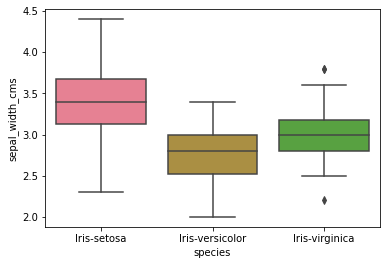

In [ ]:
#boxplot to show the distribution of the Iris species over their sepal width feature
sns.boxplot(x="species", y= "sepal_width_cms", data= iris)

#### Here, the species *Iris-setosa* has larger sepal width when compared to the species *Iris-virginica*. 



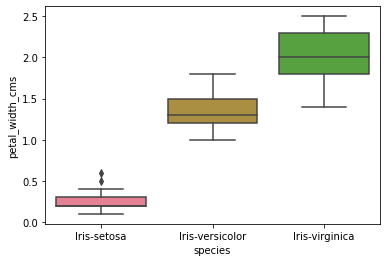

In [ ]:
#boxplot to show the distribution of the Iris species over their petal width feature
sns.boxplot(x="species", y= "petal_width_cms", data= iris)

#### From all the four box plots above , we can infer that the feature measurements of the species *Iris-versicolor* lies in between the measurement range of the other two. 

## MODEL TRAINING AND ACCURACY

## Splitting Data into labels and features

In [ ]:
X = iris.iloc[: , 1:5].values
Y = iris.iloc[:, 5].values


#### Note that the dataset contains six columns , out of which only four columns "petal_width_cms", "sepal_width_cms", "petal_length_cms" , "sepal_length_cms" describe the features. The column "species" contains the labels. 

## Label Encoding

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### KNN does not accept label with string datatype. Hence it is important to encode those labels.
#### *Iris-setosa* correspond to 0, *Iris-versicolor* correspond to 1 and *Iris-virginica* correspond to 2. 

## Splitting data into test and training test

In [ ]:
x = iris.drop(columns =["species"])
y = iris["species"]
x_train, x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2)


#### It is necessary to split our datasets into training and testing sets to avoid issues such as overfitting or underfitting.


## Training the model

In [ ]:
model=KNeighborsClassifier()

In [ ]:
model.fit(x_test, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print("Accuracy of the model is ", model.score(x_test,y_test)*100)

Accuracy of the model is  100.0
